<a href="https://colab.research.google.com/github/JuneSHYoo/monitory-ml/blob/main/Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
########################
###   데이터셋 불러오기   ###
########################

import pandas as pd

sensor_df = pd.read_csv('/content/drive/MyDrive/Factoreal/equipment_sensor_data.csv',encoding='utf-8-sig', header=0)
power_df = pd.read_csv('/content/drive/MyDrive/Factoreal/equipment_power_data.csv',encoding='utf-8-sig', header=0)

# 설비 센서 데이터
- sensor_types : {"temperature","humidity","vibration","pressure"}
- target_data : {"faulty"}     
  → 1: 이상, 0: 정상
  
- 출처 : https://www.kaggle.com/datasets/dnkumars/industrial-equipment-monitoring-dataset/code



In [5]:
########################
###  기본정보 확인
########################

print("✅ 데이터 타입 확인 ")
print(sensor_df.dtypes)
print("================ ")
print("✅ 데이터 요약 통계값 ")
print(sensor_df.describe())
print("================ ")
print("✅ 데이터 null 값 ")
print(sensor_df.isna().sum())

✅ 데이터 타입 확인 
temperature    float64
pressure       float64
vibration      float64
humidity       float64
equipment       object
location        object
faulty         float64
dtype: object
✅ 데이터 요약 통계값 
       temperature     pressure    vibration     humidity       faulty
count  7672.000000  7672.000000  7672.000000  7672.000000  7672.000000
mean     70.922478    35.738048     1.611809    50.016574     0.099974
std      16.200059    10.381593     0.728560    11.841479     0.299985
min      10.269385     3.620798    -0.428188    10.215077     0.000000
25%      62.777057    29.485682     1.170906    42.612817     0.000000
50%      70.156900    35.227544     1.533113    50.024744     0.000000
75%      77.568387    41.159913     1.924700    57.340513     0.000000
max     149.690420    79.887734     4.990537    89.984718     1.000000
✅ 데이터 null 값 
temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64


In [6]:
#############################
### 설비별 이상 감지(faulty) 횟수
#############################

sensor_df.groupby('equipment').faulty.value_counts()

equipment   faulty
Compressor  0.0       2316
            1.0        257
Pump        0.0       2282
            1.0        252
Turbine     0.0       2307
            1.0        258
Name: count, dtype: int64

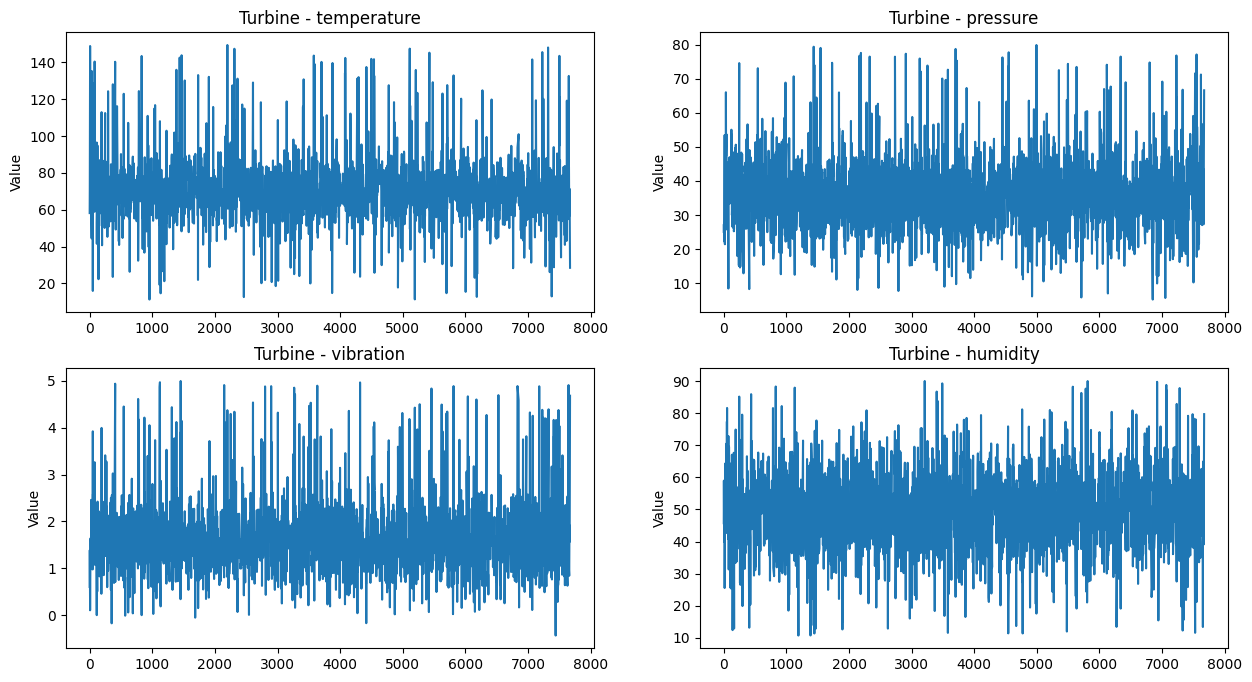

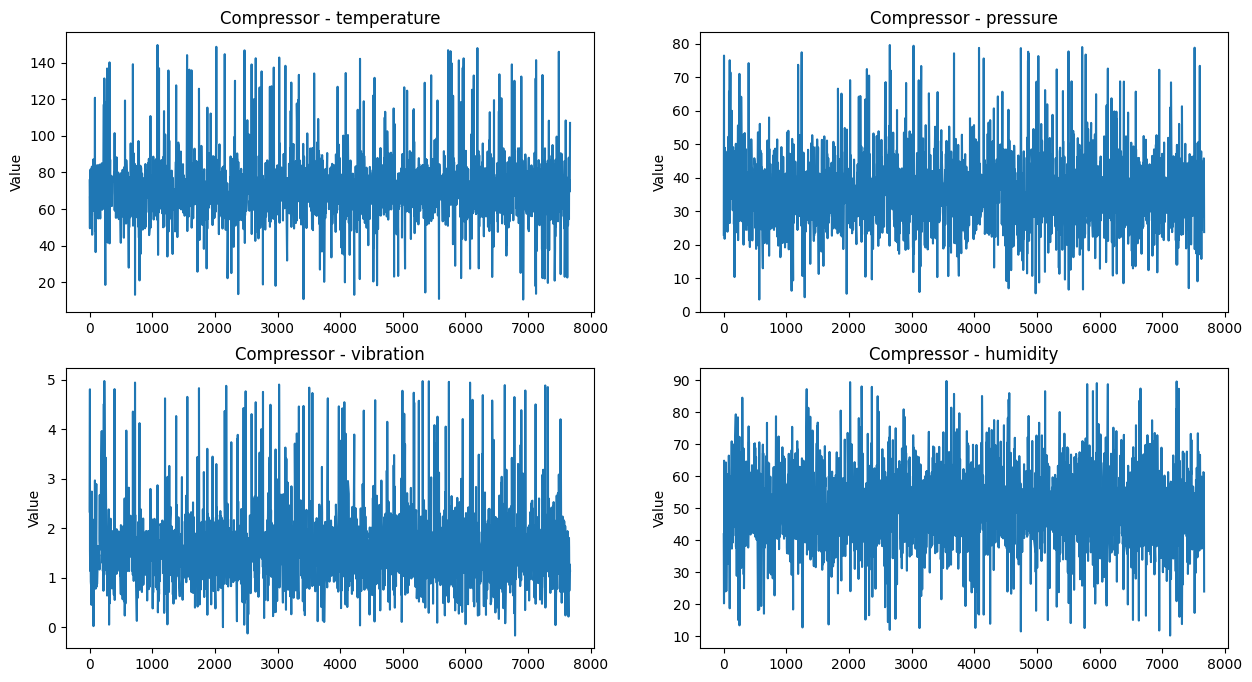

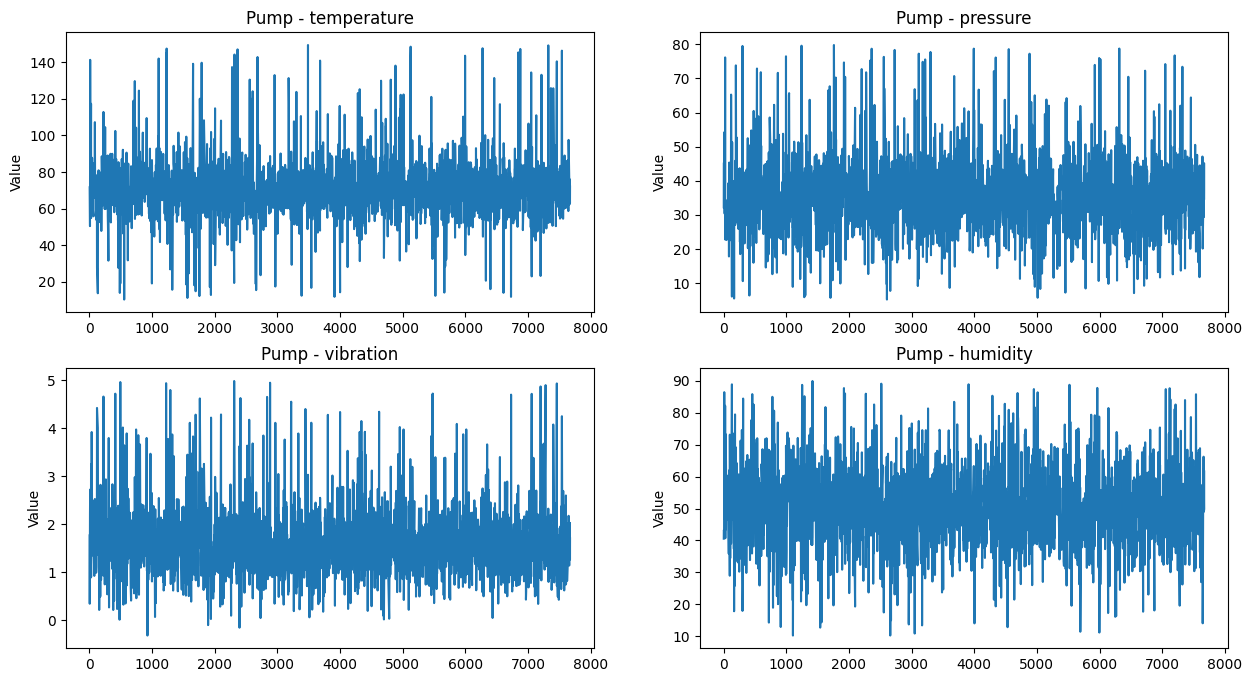

In [7]:
########################
### 설비별 센서별 lineplot
########################

import matplotlib.pyplot as plt

equips = sensor_df.equipment.unique().tolist()
sensor_types = ['temperature', 'pressure', 'vibration', 'humidity']

for equip in equips:
  plt.figure(figsize=(15, 8))
  for i, sensor in enumerate(sensor_types):
    plt.subplot(2,2,i+1)
    plt.plot(sensor_df[sensor_df.equipment == equip][sensor])
    plt.title(f"{equip} - {sensor}")
    plt.ylabel('Value')
  plt.show()

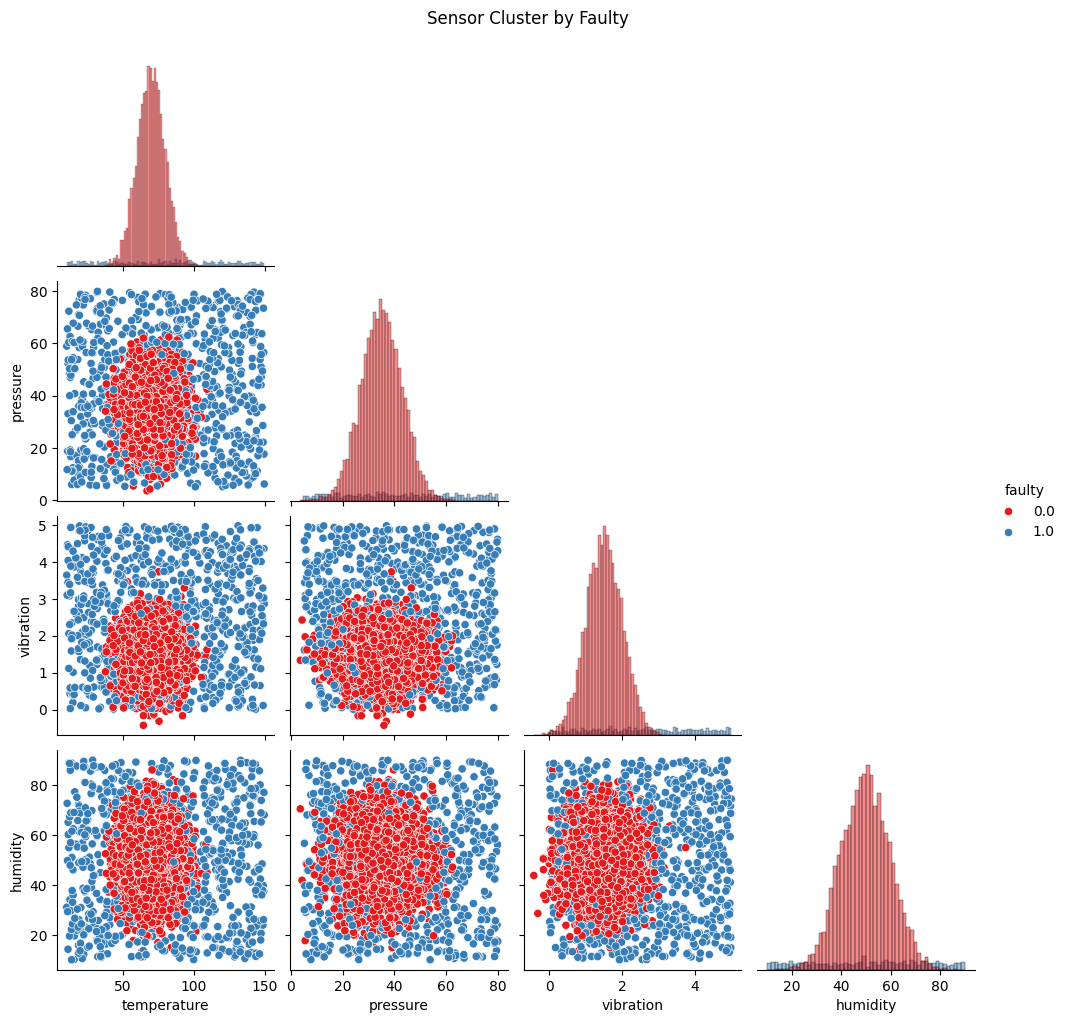

In [8]:
###########################
### 센서 조합별 faulty 클러스터
###########################
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    sensor_df,
    vars=['temperature', 'pressure', 'vibration', 'humidity'],
    hue='faulty',
    diag_kind='hist',
    corner=True,
    palette='Set1'
)
plt.suptitle('Sensor Cluster by Faulty', y=1.02)
plt.show()

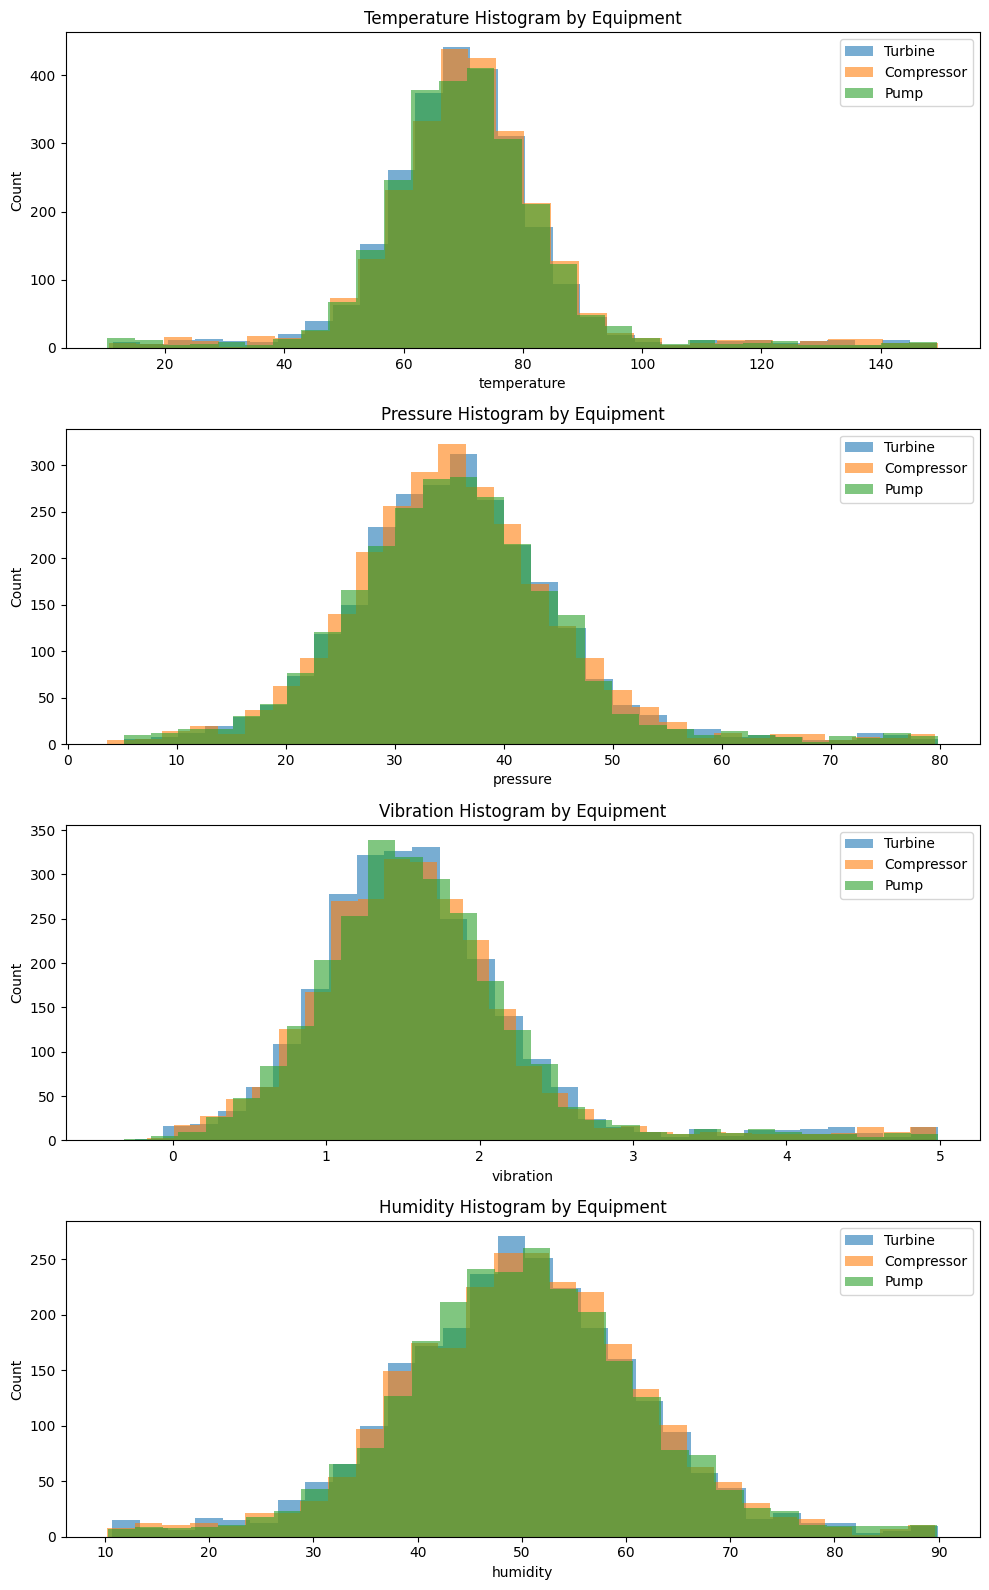

In [9]:
######################
### 센서 종류별 히스토그램
######################
import matplotlib.pyplot as plt

equips = sensor_df.equipment.unique().tolist()
sensor_types = ['temperature', 'pressure', 'vibration', 'humidity']

# 4. 히스토그램 그리기
fig, axes = plt.subplots(len(sensor_types), 1, figsize=(10, 16))
for i, sensor in enumerate(sensor_types):
    for equip in equips:
        data = sensor_df[sensor_df['equipment'] == equip][sensor]
        axes[i].hist(data, bins=30, alpha=0.6, label=equip)
    axes[i].set_title(f'{sensor.capitalize()} Histogram by Equipment')
    axes[i].set_xlabel(sensor)
    axes[i].set_ylabel('Count')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 설비 전력 데이터
- sensor_types (주요변수들만) : {"유효전력평균","무효전력평균", "누적전력량", ...}
- target_data : {"label_역률평균"}
- 출처 : https://www.aihub.or.kr/aihubdata/data/view.do?pageIndex=1&currMenu=115&topMenu=100&srchDataTy=DATA006&srchOptnCnd=OPTNCND001&searchKeyword=&srchDetailCnd=DETAILCND001&srchOrder=ORDER001&srchPagePer=20&srchDataRealmCode=REALM005&aihubDataSe=data&dataSetSn=239


In [10]:
########################
###  기본정보 확인
########################

print("✅ 데이터 타입 확인 ")
print(power_df.dtypes)
print("================ ")
print("✅ 데이터 요약 통계값 ")
print(power_df.describe())
print("================ ")
print("✅ 데이터 null 값 ")
print(power_df.isna().sum())

✅ 데이터 타입 확인 
index              int64
누적전력량            float64
유효전력평균           float64
무효전력평균           float64
주파수              float64
전류평균             float64
상전압평균            float64
선간전압평균           float64
온도               float64
R상유효전력           float64
R상무효전력           float64
R상전류             float64
R상전압             float64
R상선간전압           float64
S상유효전력           float64
S상무효전력           float64
S상전류             float64
S상전압             float64
S상선간전압           float64
T상유효전력           float64
T상무효전력           float64
T상전류             float64
T상전압             float64
T상선간전압           float64
label_역률평균        object
label_전류고조파평균     object
label_전압고조파평균     object
dtype: object
✅ 데이터 요약 통계값 
              index         누적전력량        유효전력평균        무효전력평균           주파수  \
count  2.420565e+06  2.420548e+06  2.420548e+06  2.420548e+06  2.420548e+06   
mean   1.210282e+06  8.273667e+06  3.692909e+04  2.012891e+04  5.764525e+01   
std    6.987574e+05  1.139911e+07  4.022167e+04

In [11]:
#####################
###  역률평균 타겟별 개수
#####################

power_df['label_역률평균'].value_counts()

,count
label_역률평균,
정상,1317382
경고,948810
주의,154373


In [16]:
power_df.columns

Index(['index', '누적전력량', '유효전력평균', '무효전력평균', '주파수', '전류평균', '상전압평균', '선간전압평균',
       '온도', 'R상유효전력', 'R상무효전력', 'R상전류', 'R상전압', 'R상선간전압', 'S상유효전력', 'S상무효전력',
       'S상전류', 'S상전압', 'S상선간전압', 'T상유효전력', 'T상무효전력', 'T상전류', 'T상전압', 'T상선간전압',
       'label_역률평균', 'label_전류고조파평균', 'label_전압고조파평균'],
      dtype='object')

In [17]:
# 한글 → 영문 레이블 변환 딕셔너리
label_map = {
    '경고': 'warn',
    '정상': 'normal',
    '주의': 'alert'
}

# 한글 → 영어로 바꾸기
power_df['label_elec'] = power_df['label_역률평균'].map(label_map)

power_df = power_df.rename(columns={
    '누적전력량': 'total_power',
    '유효전력평균': 'active_power',
    '무효전력평균': 'reactive_power',
})

print(power_df[['index', 'total_power', 'active_power', 'reactive_power', 'label_elec']].head(10))
power_df = power_df[['index', 'total_power', 'active_power', 'reactive_power', 'label_elec']]

   index  total_power  active_power  reactive_power label_elec
0      0    2248930.5       28963.0         20237.0     normal
1      1          0.0           0.0             0.0       warn
2      2    5375707.0       35244.0         19826.0     normal
3      3   17781200.0       77056.0         39520.0     normal
4      4   10143988.0           0.0             0.0       warn
5      5     851769.5       28033.0         14681.0     normal
6      6    2350480.0       83686.0         42722.0     normal
7      7    1963950.0       79384.0         43620.0     normal
8      8   24455900.0           0.0             0.0       warn
9      9    6732359.0           0.0             0.0       warn


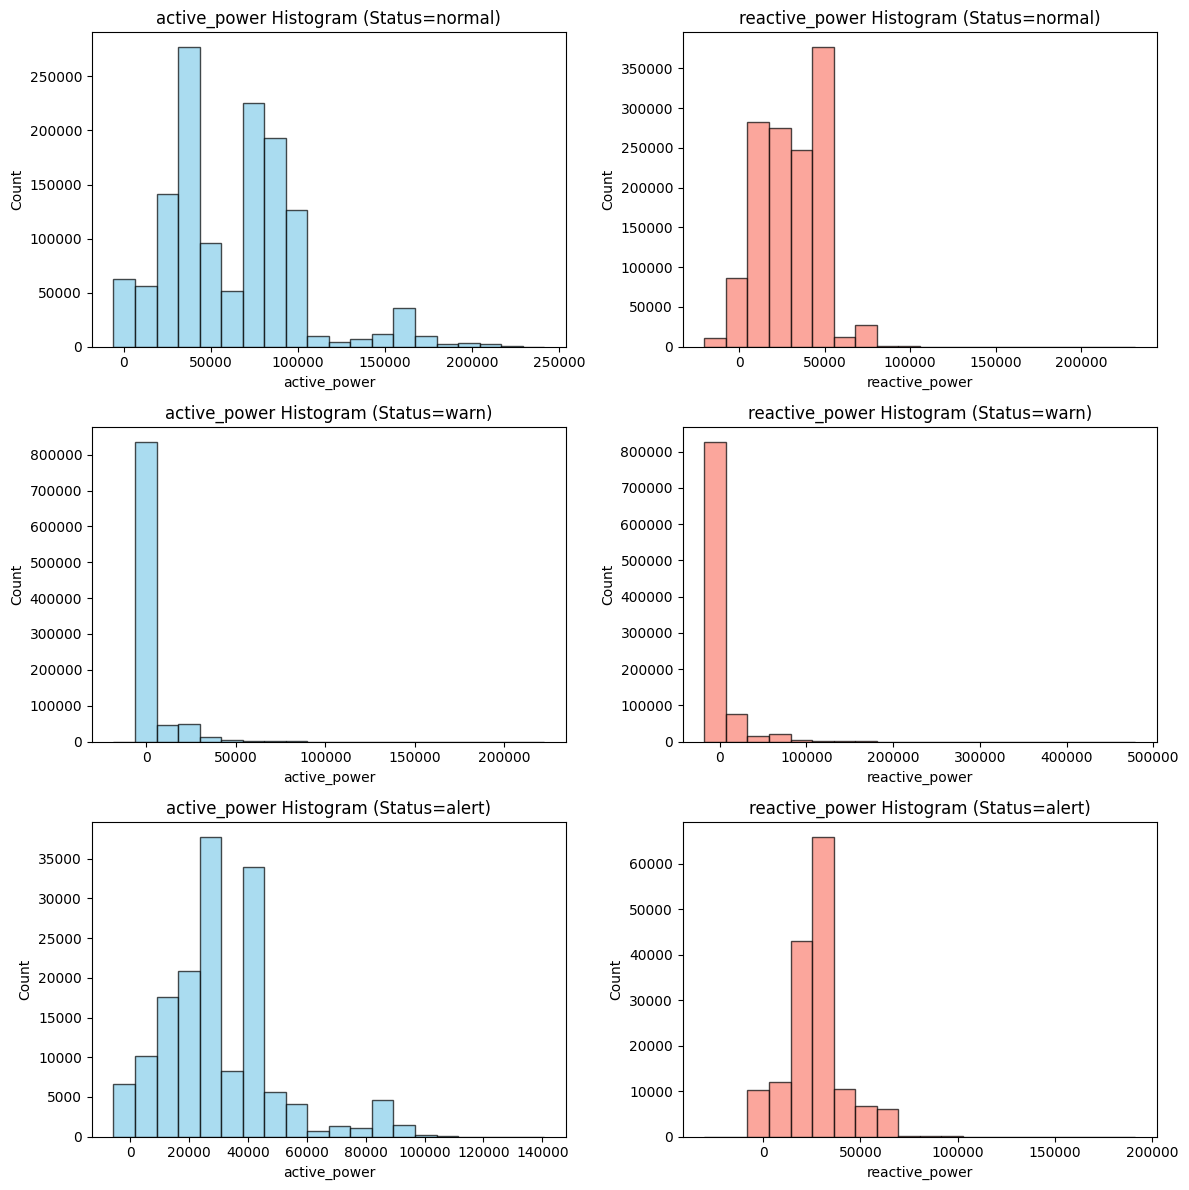

In [18]:
import matplotlib.pyplot as plt

# label_역률평균이 범주형(문자열)이라면 카테고리 추출
categories = power_df['label_elec'].unique()

fig, axes = plt.subplots(len(categories), 2, figsize=(12, 4*len(categories)))
for i, label in enumerate(categories):
    subset = power_df[power_df['label_elec'] == label]

    # 유효전력평균 히스토그램
    axes[i, 0].hist(subset['active_power'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i, 0].set_title(f'active_power Histogram (Status={label})')
    axes[i, 0].set_xlabel('active_power')
    axes[i, 0].set_ylabel('Count')

    # 무효전력평균 히스토그램
    axes[i, 1].hist(subset['reactive_power'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
    axes[i, 1].set_title(f'reactive_power Histogram (Status={label})')
    axes[i, 1].set_xlabel('reactive_power')
    axes[i, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

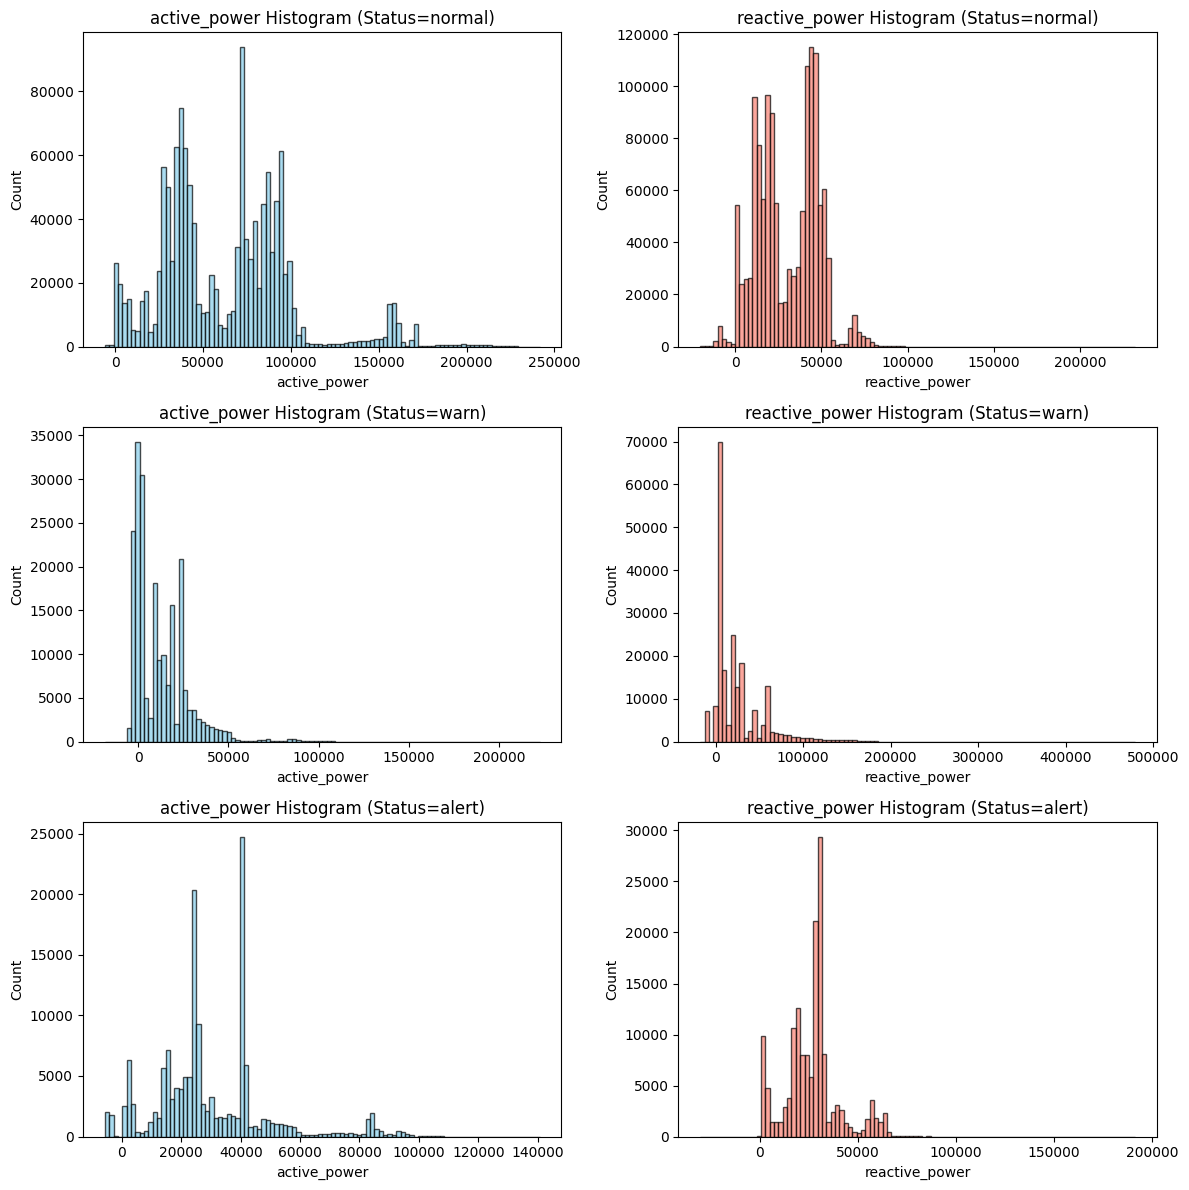

In [20]:
import matplotlib.pyplot as plt

categories = power_df['label_elec'].unique()

fig, axes = plt.subplots(len(categories), 2, figsize=(12, 4*len(categories)))
for i, label in enumerate(categories):
    subset = power_df[power_df['label_elec'] == label]

    # 0인 데이터 제거
    subset_active = subset[subset['active_power'] != 0]
    subset_reactive = subset[subset['reactive_power'] != 0]

    # 유효전력평균 히스토그램
    axes[i, 0].hist(subset_active['active_power'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i, 0].set_title(f'active_power Histogram (Status={label})')
    axes[i, 0].set_xlabel('active_power')
    axes[i, 0].set_ylabel('Count')

    # 무효전력평균 히스토그램
    axes[i, 1].hist(subset_reactive['reactive_power'], bins=100, color='salmon', edgecolor='black', alpha=0.7)
    axes[i, 1].set_title(f'reactive_power Histogram (Status={label})')
    axes[i, 1].set_xlabel('reactive_power')
    axes[i, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

<Axes: xlabel='active_power', ylabel='reactive_power'>

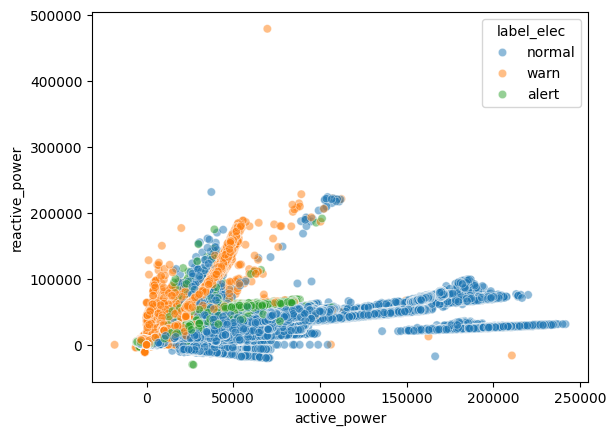

In [24]:
sns.scatterplot(data=power_df, x='active_power', y='reactive_power', hue='label_elec', alpha=0.5)

<Axes: xlabel='label_elec', ylabel='power_factor'>

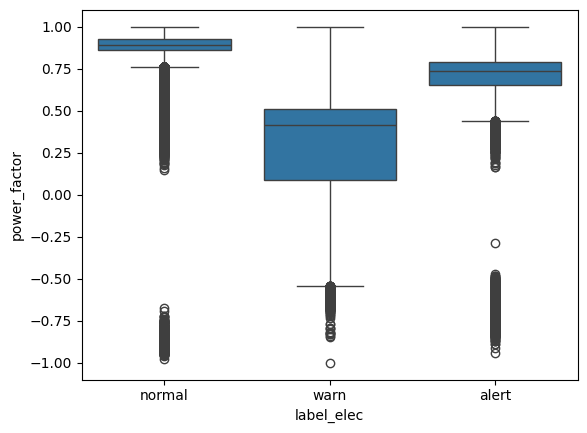

In [25]:
power_df['power_factor'] = power_df['active_power'] / np.sqrt(power_df['active_power']**2 + power_df['reactive_power']**2)
sns.boxplot(data=power_df, x='label_elec', y='power_factor')

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# label → 색상 매핑
color_dict = {'normal':'blue', 'warn':'orange', 'alert':'green'}

# index 반드시 정렬!
df_sorted = power_df.sort_values('index').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(14,6))

# (1) 인덱스별 연속한 두 점씩 순회
for i in range(len(df_sorted)-1):
    x = df_sorted.loc[i:i+1, 'index']
    y = df_sorted.loc[i:i+1, 'active_power']
    label = df_sorted.loc[i, 'label_elec']
    color = color_dict.get(label, 'gray')
    ax.plot(x, y, color=color, linewidth=1)

# (2) legend 따로 수동 추가
for label, color in color_dict.items():
    ax.plot([], [], color=color, label=label)
ax.legend(title='label_elec')
ax.set_title('Active Power by Index (segment color by label_elec)')
ax.set_xlabel('index')
ax.set_ylabel('active_power')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7cde251f6f20> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7cde251f4a40> (for post_execute):


KeyboardInterrupt: 